In [1]:
import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    print('GPU device not found')

Found GPU at: /device:GPU:0


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1080 Ti


In [3]:
import pandas as pd

In [4]:
# importing the pandas library
import pandas as pd

# reading the csv file
df = pd.read_csv('IMDB_Dataset.csv')

# updating the column value/data
df['sentiment'] = df['sentiment'].replace({'negative': 0})

# writing into the file
df.to_csv('IMDB_Dataset.csv', index=False)

print(df)


                                                  review  sentiment
0      One of the other reviewers has mentioned that ...          1
1      A wonderful little production. <br /><br />The...          1
2      I thought this was a wonderful way to spend ti...          1
3      Basically there's a family where a little boy ...          0
4      Petter Mattei's "Love in the Time of Money" is...          1
...                                                  ...        ...
49995  I thought this movie did a down right good job...          1
49996  Bad plot, bad dialogue, bad acting, idiotic di...          0
49997  I am a Catholic taught in parochial elementary...          0
49998  I'm going to have to disagree with the previou...          0
49999  No one expects the Star Trek movies to be high...          0

[50000 rows x 2 columns]


In [5]:
from numpy.random import RandomState
#%% Split whole dataset into train and valid set
df = pd.read_csv('IMDB_Dataset.csv')
rng = RandomState()

train = df.sample(frac=0.7, random_state=rng)
test = df.loc[~df.index.isin(train.index)]
train.to_csv('train-imdb.csv', index=False)
test.to_csv('test-imdb.csv', index=False)

In [6]:
train_df = pd.read_csv("train-imdb.csv", encoding='unicode_escape', header=0)

In [7]:
train_df

,review,sentiment
0,This show was laughably bad. The writing sucke...,0
1,"What network was , Diagnosis Murder on? I thou...",1
2,The folk who produced this masterful film have...,1
3,I thought that Mr. Dreyfuss was perfect for hi...,1
4,Loved today's show!!! It was a variety and not...,1
...,...,...
34995,'Blade' would be an extremely above-average co...,1
34996,"Seeing this film, or rather set of films, in m...",1
34997,A chemist develops a fabric that never gets di...,1
34998,"From the opening shots of the lead actor, we a...",1


In [8]:
train_df.iloc[0][1]

C:\Users\huyen\AppData\Local\Temp\ipykernel_11176\1864895821.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  train_df.iloc[0][1]


0

In [9]:
test_df = pd.read_csv("test-imdb.csv", encoding='unicode_escape', header=0)

In [10]:
test_df.shape

(15000, 2)

In [11]:
test_df.head()

,review,sentiment
0,I sure would like to see a resurrection of a u...,1
1,If you like original gut wrenching laughter yo...,1
2,So im not a big fan of Boll's work but then ag...,0
3,This was the worst movie I saw at WorldFest an...,0
4,This movie was so frustrating. Everything seem...,0


In [12]:
train_df['sentiment'] = (train_df['sentiment']==1).astype(int)
test_df['sentiment'] = (test_df['sentiment']==1).astype(int)

train_df.head(30)

,review,sentiment
0,This show was laughably bad. The writing sucke...,0
1,"What network was , Diagnosis Murder on? I thou...",1
2,The folk who produced this masterful film have...,1
3,I thought that Mr. Dreyfuss was perfect for hi...,1
4,Loved today's show!!! It was a variety and not...,1
5,"Have you ever, or do you have, a pet who's bee...",1
6,another eli roth in the making. self promoting...,0
7,"This tiresome, plodding Las Vegas casino heist...",0
8,I didn't think the French could make a bad mov...,0
9,It reaches the minds and feelings of everyone ...,1


In [13]:
test_df.head()

,review,sentiment
0,I sure would like to see a resurrection of a u...,1
1,If you like original gut wrenching laughter yo...,1
2,So im not a big fan of Boll's work but then ag...,0
3,This was the worst movie I saw at WorldFest an...,0
4,This movie was so frustrating. Everything seem...,0


In [14]:
train_df_bert = pd.DataFrame({
    "id": range(len(train_df)),
    "label": train_df['sentiment'],
    "sentence": train_df['review'].replace(r'\n', ' ', regex=True)
})

train_df_bert.head()

,id,label,sentence
0,0,0,This show was laughably bad. The writing sucke...
1,1,1,"What network was , Diagnosis Murder on? I thou..."
2,2,1,The folk who produced this masterful film have...
3,3,1,I thought that Mr. Dreyfuss was perfect for hi...
4,4,1,Loved today's show!!! It was a variety and not...


In [15]:
train_df_bert

,id,label,sentence
0,0,0,This show was laughably bad. The writing sucke...
1,1,1,"What network was , Diagnosis Murder on? I thou..."
2,2,1,The folk who produced this masterful film have...
3,3,1,I thought that Mr. Dreyfuss was perfect for hi...
4,4,1,Loved today's show!!! It was a variety and not...
...,...,...,...
34995,34995,1,'Blade' would be an extremely above-average co...
34996,34996,1,"Seeing this film, or rather set of films, in m..."
34997,34997,1,A chemist develops a fabric that never gets di...
34998,34998,1,"From the opening shots of the lead actor, we a..."


In [16]:
train_df_bert = train_df_bert.iloc[0:10000]

In [17]:
train_df_bert

,id,label,sentence
0,0,0,This show was laughably bad. The writing sucke...
1,1,1,"What network was , Diagnosis Murder on? I thou..."
2,2,1,The folk who produced this masterful film have...
3,3,1,I thought that Mr. Dreyfuss was perfect for hi...
4,4,1,Loved today's show!!! It was a variety and not...
...,...,...,...
9995,9995,0,After seeing the credits with only one name th...
9996,9996,0,"I have copy of this on VHS, I think they (The ..."
9997,9997,1,"When I went to see Bon Voyage, I expected a go..."
9998,9998,1,I had no idea of the facts this film presents....


In [18]:
test_df_bert = pd.DataFrame({
    "id": range(len(test_df)),
    "label": test_df['sentiment'],
    "sentence": test_df['review'].replace(r'\n', ' ', regex=True)
})

test_df_bert.head()

,id,label,sentence
0,0,1,I sure would like to see a resurrection of a u...
1,1,1,If you like original gut wrenching laughter yo...
2,2,0,So im not a big fan of Boll's work but then ag...
3,3,0,This was the worst movie I saw at WorldFest an...
4,4,0,This movie was so frustrating. Everything seem...


In [19]:
test_df_bert = test_df_bert.iloc[0:3000]

In [20]:
test_df_bert

,id,label,sentence
0,0,1,I sure would like to see a resurrection of a u...
1,1,1,If you like original gut wrenching laughter yo...
2,2,0,So im not a big fan of Boll's work but then ag...
3,3,0,This was the worst movie I saw at WorldFest an...
4,4,0,This movie was so frustrating. Everything seem...
...,...,...,...
2995,2995,0,Kind of hard to believe that the movie from th...
2996,2996,1,I'm a fan of independent film. Dialogue driven...
2997,2997,1,"Not high art, not even exceptionally innovativ..."
2998,2998,0,I'm not going to waste my time writing an essa...


In [21]:
# Get the lists of sentences and their labels.
train_sentences = train_df_bert.sentence.values
train_labels = train_df_bert.label.values

In [22]:
# Get the lists of sentences and their labels.
test_sentences = test_df_bert.sentence.values
test_labels = test_df_bert.label.values

In [23]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [24]:
# Print the original sentence.
print(' Original: ', train_sentences[1])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(train_sentences[1]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(train_sentences[1])))

 Original:  What network was , Diagnosis Murder on? I thought it was CBS. Am I right or?? Also, Back in those days, the actual production H.Q. was near about the Van Nuys Airport. I surely remember, because I practically made nearly two episodes in those daze. More. I remember the early days. I had found an article in Reader's Digest giving this actor/writer a clue to a terrific episode. So just for suggesting it I was awarded. Awarded or not, I sadly didn't develop it, and was cut out of it all due to poor publicity of mine. So as a justification I learned as I always have, the hard way... Roll the dice..Craps!!! Just a side bar on Mr. Van Dyke. He had a house in the Brentwood area on Chalon Road and it was an incredible party house. Dick had a terrific sense of modernism when he built that house.
Tokenized:  ['what', 'network', 'was', ',', 'diagnosis', 'murder', 'on', '?', 'i', 'thought', 'it', 'was', 'cbs', '.', 'am', 'i', 'right', 'or', '?', '?', 'also', ',', 'back', 'in', 'those',

In [25]:
import warnings
warnings.filterwarnings('ignore')

max_len_train = 0

# For every sentence...
for sent in train_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_train = max(max_len_train, len(input_ids))

print('Max sentence length: ', max_len_train)

Max sentence length:  190


In [26]:
max_len_test = 0

# For every sentence...
for sent in test_sentences:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(sent[:512], add_special_tokens=True)

    # Update the maximum sentence length.
    max_len_test = max(max_len_test, len(input_ids))

print('Max sentence length: ', max_len_test)

Max sentence length:  180


In [27]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in train_sentences:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 300,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                        truncation=True
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(train_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', train_sentences[0])
print('Token IDs:', input_ids[0])

Original:  This show was laughably bad. The writing sucked, the dialog sucked. The guy who played Craig couldn't act his way out of a paper sack. Being it was on Thursday night, this was definitely great to watch with some beers. Cool music, bad acting, poor writing, all came together for my entertainment.<br /><br />It was a drama/unintentional comedy. I don't care what happened to any of the characters, they were all boring and stupid. The first five episodes were the worst, since they couldn't reveal who the victim was, they had to write the dialog around it, which was terrible. I mean, the eulogy at the funeral was ridiculous. Actually, all the scenes that occurred in the present were utterly horrible.<br /><br />So, let's review. Everything happening in present time sucked. The flashback scenes, only the writing, dialog and Craig's acting sucked. The music ruled though.
Token IDs: tensor([  101,  2023,  2265,  2001,  4756,  8231,  2919,  1012,  1996,  3015,
         8631,  1010,  

In [28]:

train_df_bert.head()

,id,label,sentence
0,0,0,This show was laughably bad. The writing sucke...
1,1,1,"What network was , Diagnosis Murder on? I thou..."
2,2,1,The folk who produced this masterful film have...
3,3,1,I thought that Mr. Dreyfuss was perfect for hi...
4,4,1,Loved today's show!!! It was a variety and not...


In [29]:
(x_train, y_train), (x_test, y_test) = (train_df_bert.sentence,train_df_bert.label),(test_df_bert.sentence,test_df_bert.label)

In [30]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [31]:
from keras_preprocessing.sequence import pad_sequences
# 2 - Define the number of words to be used from a review (truncate and pad input sequences)
print('Pad sequences (samples x time)')

max_review_length = 60

x_train = pad_sequences(x_train, maxlen=max_review_length)
print('X_train shape:',x_train.shape)
x_test = pad_sequences(x_test, maxlen=max_review_length)
print('X_test shape:',x_test.shape)

Pad sequences (samples x time)
X_train shape: (10000, 60)
X_test shape: (3000, 60)


In [32]:
from keras import backend as K
from tensorflow import keras
import tensorflow as tf

class FuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_centers=None,
                 initial_sigmas=None, 
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_centers = initial_centers
        self.initial_sigmas = initial_sigmas
        super(FuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        c_init_values =[]
        
        if self.initial_centers is None:
            c_init_values= tf.random_uniform_initializer(-1, 1)(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            c_init_values =tf.convert_to_tensor(self.initial_centers, dtype="float32")
        self.c = tf.Variable(initial_value= c_init_values, trainable=True)

        a_init_values = []
        if self.initial_sigmas is None:
            a_init_values = tf.ones_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            a_init_values = tf.convert_to_tensor(self.initial_sigmas, dtype="float32")
        self.a = tf.Variable(initial_value= a_init_values, trainable=True)
        super(FuzzyLayer, self).build(input_shape)  

    def call(self, x):
        
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_c = self.c
        aligned_a = self.a
        for dim in self.input_dimensions:
            aligned_c = K.repeat_elements(K.expand_dims(aligned_c, 0), dim, 0)
            aligned_a = K.repeat_elements(K.expand_dims(aligned_a, 0), dim, 0)

        xc = K.exp(-K.sum(K.square((aligned_x - aligned_c) / (2 * aligned_a)), axis=-2, keepdims=False))
        
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)


In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

class DefuzzyLayer(keras.layers.Layer):

    def __init__(self, 
                 output_dim, 
                 initial_rules_outcomes=None,
                 **kwargs):
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
        self.output_dim = output_dim
        self.initial_rules_outcomes = initial_rules_outcomes
        super(DefuzzyLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        self.input_dimensions = list(input_shape)[:-1:-1]

        outcomes_init_values = []
        if self.initial_rules_outcomes is None:
            outcomes_init_values = tf.random_uniform_initializer()(shape=(input_shape[-1], self.output_dim), dtype="float32")    
        else:
            outcomes_init_values = tf.convert_to_tensor(self.initial_rules_outcomes, dtype="float32")
        
        self.rules_outcome = tf.Variable(initial_value = outcomes_init_values, trainable=True)
        
        super(DefuzzyLayer, self).build(input_shape)  

    def call(self, x):
        aligned_x = K.repeat_elements(K.expand_dims(x, axis = -1), self.output_dim, -1)
        aligned_rules_outcome = self.rules_outcome
        for dim in self.input_dimensions:
            aligned_rules_outcome = K.repeat_elements(K.expand_dims(aligned_rules_outcome, 0), dim, 0)
        
        xc = K.sum((aligned_x * aligned_rules_outcome), axis=-2, keepdims=False)
        return xc
        
    def compute_output_shape(self, input_shape):
        return tuple(input_shape[:-1]) + (self.output_dim,)
    
    def get_config(self):
        return {"rules_outcome": self.rules_outcome.numpy()}


In [34]:

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, Flatten
from keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D,MaxPooling1D
from keras.layers import Embedding
import matplotlib.pyplot as plt
#from FuzzyLayer import FuzzyLayer
#from DefuzzyLayer import DefuzzyLayer

# 3 - Neural network model design
print('Building model')
max_features = 2000
embedding_vector_length = 32

filters = 32
kernel_size = 3
hidden_dims = 40
nb_classes = 2

model = Sequential()
model.add(Embedding(max_features, embedding_vector_length, input_length=max_review_length))

model.add(Bidirectional(LSTM(30,activation='tanh',
                             recurrent_activation='sigmoid',
                             return_state=False,
                             return_sequences=False)))
model.add(Dropout(0.1))
model.add(FuzzyLayer(20, input_dim=2))
model.add(Dropout(0.1))
model.add(DefuzzyLayer(10))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Building model
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 32)            64000     
_________________________________________________________________
bidirectional (Bidirectional (None, 60)                15120     
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
fuzzy_layer (FuzzyLayer)     (None, 20)                2400      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
defuzzy_layer (DefuzzyLayer) (None, 10)                200       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)  

In [35]:
nb_classes

2

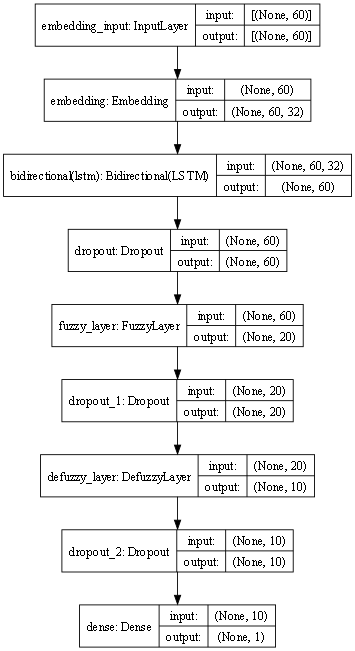

In [36]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

In [37]:
import numpy
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 4 - Train the neural network model
history = model.fit(x_train, y_train,
                    epochs=20,
                    verbose=True,
                    callbacks=[es_callback],
                    #validation_data=(x_test, y_test),
                    validation_split=0.1,
                    batch_size=10)

loss, accuracy = model.evaluate(x_train, y_train, verbose=True)
print("Training Accuracy: {:.6f}".format(accuracy))
print("Training Loss: {:.6f}".format(loss))
loss, accuracy = model.evaluate(x_test, y_test, verbose=True)
print("Testing Accuracy:  {:.6f}".format(accuracy))
print("Testing Loss:  {:.6f}".format(loss))


Epoch 1/20
900/900 [==============================] - 19s 15ms/step - loss: 0.6839 - accuracy: 0.5516 - val_loss: 0.6800 - val_accuracy: 0.6190
Epoch 2/20
900/900 [==============================] - 13s 14ms/step - loss: 0.5635 - accuracy: 0.7317 - val_loss: 0.5597 - val_accuracy: 0.7680
Epoch 3/20
900/900 [==============================] - 13s 14ms/step - loss: 0.4398 - accuracy: 0.8189 - val_loss: 0.4605 - val_accuracy: 0.7930
Epoch 4/20
900/900 [==============================] - 13s 14ms/step - loss: 0.3612 - accuracy: 0.8463 - val_loss: 0.4326 - val_accuracy: 0.8040
Epoch 5/20
900/900 [==============================] - 13s 14ms/step - loss: 0.3124 - accuracy: 0.8701 - val_loss: 0.4603 - val_accuracy: 0.7960
Epoch 6/20
900/900 [==============================] - 13s 14ms/step - loss: 0.2716 - accuracy: 0.8872 - val_loss: 0.4904 - val_accuracy: 0.8140
Epoch 7/20
313/313 [==============================] - 4s 7ms/step - loss: 0.2046 - accuracy: 0.9235
Training Accuracy: 0.923500
Training

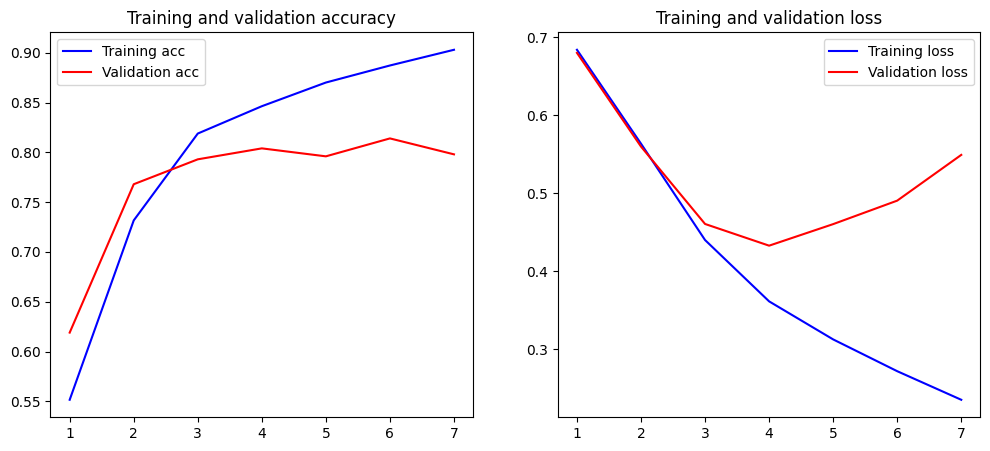

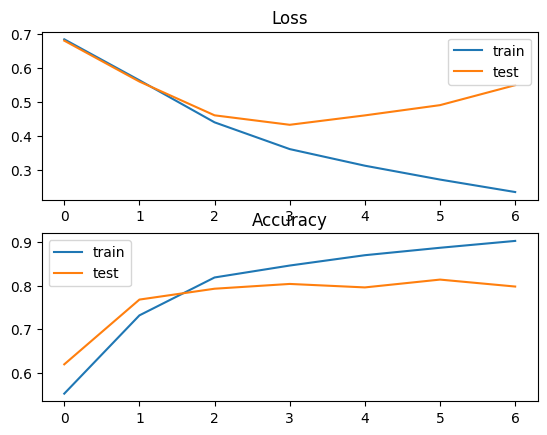

In [38]:
import matplotlib.pyplot as plt
#% matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()